Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv("comment_new_final.csv", encoding="utf-8", index_col=0)

Check NAN


In [4]:
print('Data shape:', df.shape)
missing_val_num = df.isnull().sum()
missing_percent = (missing_val_num / df.shape[0]) * 100
missing_info = {'missing_values': missing_val_num,
                'missing_percent': round(missing_percent,3)}
missing_df = pd.DataFrame(missing_info)
missing_df

Data shape: (196125, 2)


,missing_values,missing_percent
processed_text,21727,11.078
class,0,0.000


In [5]:
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(174398, 2)
processed_text    0
class             0
dtype: int64


Duplicate Data


In [6]:
df[df.duplicated()]

,processed_text,class
4,sản_phẩm chất_lượng như_mô tả đóng_gói rất_đán...,positive
28,sản_phẩm bị_chảy rất_khó cắt nhão dính,negative
98,chất_lượng kém,negative
129,hàng,positive
132,dán,positive
...,...,...
196104,thiết,positive
196106,sản_phẩm tốt như_mô tả,positive
196107,hàng,positive
196112,xuất_hóa_đơn,neutral


In [7]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
print('Duplicate data:', df.duplicated().sum())
print(df.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

Duplicate data: 0
(134213, 2)


In [8]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)
X = tfidf_vectorizer.fit_transform(df['processed_text'].values.astype('U'))
y = df['class']
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())



c:\Users\marsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
df_new.head()

,bút,bền,chuột,chất_lượng,cẩn_thận,dây,dầu,giá,giấy,gói,...,êm,đóng,đóng gói,đóng_gói,đầu,đẹp,đổi,độ,ổn,ủng_hộ
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.25181,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.281762,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.25181,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.281762,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(X.shape, y.shape)

(134213, 52) (134213,)


In [11]:
from sklearn.naive_bayes import GaussianNB



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['class'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test.toarray())

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy: ', accuracy)


Test accuracy:  0.5351488283723876


              precision    recall  f1-score   support

    negative       0.30      0.85      0.44      4218
     neutral       0.10      0.19      0.13      1960
    positive       0.94      0.50      0.66     20665

    accuracy                           0.54     26843
   macro avg       0.45      0.51      0.41     26843
weighted avg       0.78      0.54      0.58     26843



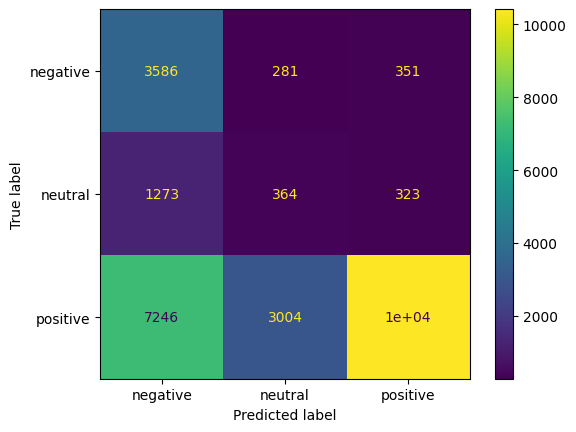

In [12]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);


In [13]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Define the parameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a GaussianNB classifier
clf = GaussianNB()

# Use GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(iris.data, iris.target)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'var_smoothing': 1e-09}
Best score: 0.9533333333333334


In [14]:
clf_tuned = GaussianNB(var_smoothing=1e-09)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2)
# Train the classifier
clf_tuned.fit(X_train, y_train)
# Make predictions
y_pred = clf_tuned.predict(X_test)
# Calculate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print('Test accuracy: ', accuracy_test)


Test accuracy:  0.5347390381104944


              precision    recall  f1-score   support

    negative       0.29      0.86      0.43      4110
     neutral       0.11      0.19      0.14      2000
    positive       0.94      0.50      0.66     20733

    accuracy                           0.53     26843
   macro avg       0.45      0.52      0.41     26843
weighted avg       0.78      0.53      0.58     26843



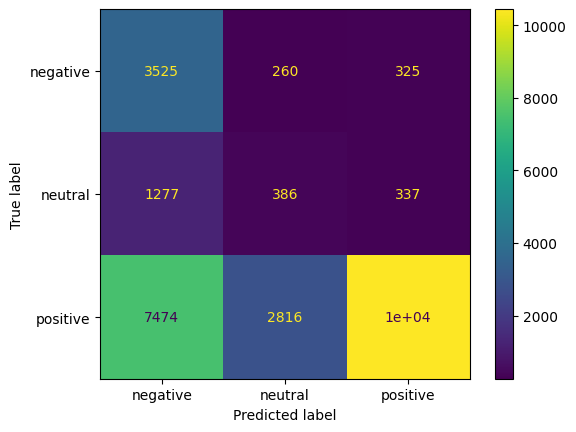

In [15]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);


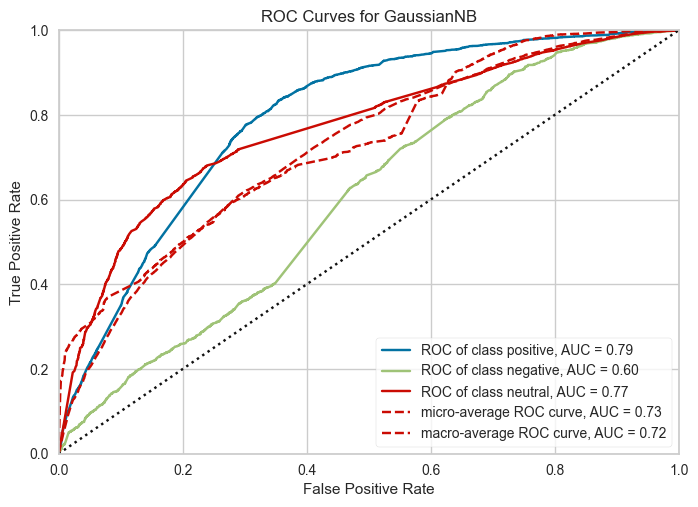

<AxesSubplot: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(clf, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()